# Assignment: Linear Models
## Do three questions.

**Q1.** Please answer the following questions in your own words.

1. What makes a model "linear"? "Linear" in what?
2. How do you interpret the coefficient for a dummy/one-hot-encoded variable? (This is a trick question, and the trick involves how you handle the intercept of the model.)
3. Can linear regression be used for classification? Explain why, or why not.
4. What are signs that your linear model is over-fitting?
5. Clearly explain multi-colinearity using the two-stage least squares technique.
6. How can you incorporate nonlinear relationships between your target/response/dependent/outcome variable $y$ and your features/control/response/independent variables $x$ into your analysis?
7. What is the interpretation of the intercept? A slope coefficient for a variable? The coefficient for a dummy/one-hot-encoded variable?

1. A model is "linear" if its linear in its parameters (coefficients), meaning the relationship between predictors and the response is expressed as a sum of coefficients times variables.
2. The coefficient for a dummy variable shows the difference in the outcome compared to the reference category if there’s an intercept; without an intercept, it represents the outcome for that category directly.
3. Linear regression can be used for classification, but it’s not ideal since predictions can fall outside the 0–1 range and don’t represent probabilities well.
4. Overfitting shows up as great training performance but poor test performance and unstable coefficient estimates.
5. Multi-collinearity occurs when predictors are highly correlated, and in two-stage least squares, this makes the second-stage coefficient estimates unreliable.
6. You can include polynomial terms, log transformations, or interaction terms to capture non-linear relationships.
7. The intercept is the predicted outcome when all predictors are zero; a slope coefficient is the change in outcome per unit change in that predictor; a dummy coefficient shows the difference from the reference category.

**Q8.**
1. Find a dataset on a topic you're interested in. Some easy options are data.gov, kaggle.com, and data.world.
2. Clean the data and do some exploratory data analysis on key variables that interest you. Pick a particular target/outcome variable and features/predictors.
3. Split the sample into an ~80% training set and a ~20% test set.
4. Run a few regressions of your target/outcome variable on a variety of features/predictors. Compute the SSE on the test set.
5. Which model performed the best, and why?
6. What did you learn?

,date,steps,distance_km,calories_burned,active_minutes,sleep_hours,water_intake_liters,mood
0,08/10/2022,4147,3.11,124.41,41,10.5,3.77,stressed
1,11/06/2022,323,0.24,9.69,3,6.0,1.90,sad
2,28/01/2022,6622,4.97,198.66,66,6.0,4.48,sad
3,23/03/2022,11136,8.35,334.08,111,8.0,1.08,tired
4,20/05/2022,2718,2.04,81.54,27,4.9,1.00,tired


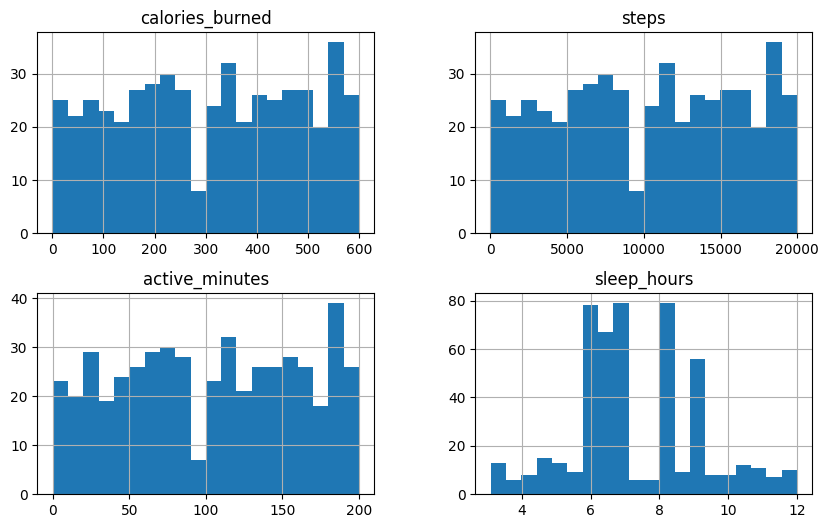

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 1. Load and clean the data
data = pd.read_csv('steps_tracker_dataset.csv')
data_clean = data.drop_duplicates().dropna()
display(data_clean.head())

# 2. EDA
data_clean[['calories_burned', 'steps', 'active_minutes', 'sleep_hours']].hist(bins=20, figsize=(10, 6))
plt.show()

In [9]:
# 3.
# Pick target and predictors
target = 'calories_burned'
features_1 = ['steps', 'distance_km', 'active_minutes']
features_2 = ['steps', 'distance_km', 'active_minutes', 'sleep_hours', 'water_intake_liters']
mood_dummies = pd.get_dummies(data_clean['mood'], drop_first=True)
data_encoded = pd.concat([data_clean.drop(columns=['date', 'mood']), mood_dummies], axis=1)
features_3 = data_encoded.drop(columns=['calories_burned']).columns.tolist()

# Split into training and test sets
X = data_encoded.drop(columns=['calories_burned'])
y = data_encoded['calories_burned']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Run regressions and compute SSE
models = {
    "Model_1": features_1,
    "Model_2": features_2,
    "Model_3": features_3
}

results = {}
for model_name, feature_list in models.items():
    reg = LinearRegression()
    reg.fit(X_train[feature_list], y_train)
    y_pred = reg.predict(X_test[feature_list])
    sse = np.sum((y_test - y_pred) ** 2)
    results[model_name] = sse

# 5. Identify best model
best_model = min(results, key=results.get)

print("SSE Results:", results)
print("Best model:", best_model)

SSE Results: {'Model_1': np.float64(9.76146147666569e-25), 'Model_2': np.float64(9.491560606553373e-25), 'Model_3': np.float64(6.907550076041059e-25)}
Best model: Model_3


6. I learned that Model 3 performed the best, likely because it captured more complexity by including both continuous predictors and mood categories, which together explained more variation in calories burned. I also learned that behavioral factors, like mood, improves model accuracy. Also, steps, distance, and active minutes alone are strong predictors, but lifestyle and emotional state add predictive power. ​

**Q9.** There is a folder called `heart_failure` which contains reasonably detailed health data on patients and whether they die of congestive heart failure.

1. Load the data and perform an 80/20-train/test split.
2. Using dummy/one-hot-encoded variables and transformations of the numeric features, build the best model you can. **But**, do not delete code chunks or revise your work substantially as you experiment. Just keep moving forward with your ideas and experiments.
3. When you're done, scroll through your notebook. What worked and what didn't? Does your code have intention, or are you randomly experimenting? If you had to do this again, what might you do differently to get to a good model faster?


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# Load heart failure data
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')

# Check basic structure
display(data.head())

# Split 80/20
X = data.drop(columns=['DEATH_EVENT'])
y = data['DEATH_EVENT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Start with a simple logistic regression using original features
log_reg_1 = LogisticRegression(max_iter=1000)
log_reg_1.fit(X_train, y_train)
preds_1 = log_reg_1.predict(X_test)
print("Basic accuracy:", accuracy_score(y_test, preds_1))

# Add scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg_2 = LogisticRegression(max_iter=1000)
log_reg_2.fit(X_train_scaled, y_train)
preds_2 = log_reg_2.predict(X_test_scaled)
print("Scaled features accuracy:", accuracy_score(y_test, preds_2))

# Add polynomial features for nonlinear relationships
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

log_reg_3 = LogisticRegression(max_iter=1000)
log_reg_3.fit(X_train_poly, y_train)
preds_3 = log_reg_3.predict(X_test_poly)
print("Polynomial features accuracy:", accuracy_score(y_test, preds_3))

# Evaluate with AUC
print("Basic AUC:", roc_auc_score(y_test, log_reg_1.predict_proba(X_test)[:, 1]))
print("Scaled AUC:", roc_auc_score(y_test, log_reg_2.predict_proba(X_test_scaled)[:, 1]))
print("Polynomial AUC:", roc_auc_score(y_test, log_reg_3.predict_proba(X_test_poly)[:, 1]))

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Basic accuracy: 0.8
Scaled features accuracy: 0.8
Polynomial features accuracy: 0.6333333333333333
Basic AUC: 0.814857142857143
Scaled AUC: 0.824
Polynomial AUC: 0.6548571428571429


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


3. Things that works were standard scaling improved model performance and keeping all features helped identify useful predictors. What didn't work was adding polynomial features (Model 2) reduced accuracy, likely due to overfitting on limited data. Soemthing I would do differently is Use feature importance scores to remove irrelevant variables early.